In [26]:
import jax.numpy as np
from qutip import *
from jax import grad


$R(\phi,\theta,\omega) = RZ(\omega)RY(\theta)RZ(\phi)= \begin{bmatrix}
e^{-i(\phi+\omega)/2}\cos(\theta/2) & -e^{i(\phi-\omega)/2}\sin(\theta/2) \\
e^{-i(\phi-\omega)/2}\sin(\theta/2) & e^{i(\phi+\omega)/2}\cos(\theta/2)
\end{bmatrix}$

In [9]:
def rot(phi, theta, omega):
    cos = np.cos(theta/2)
    sin = np.sin(theta/2)

    return np.array(
    [
        [np.exp(-0.5j*(phi+omega))*cos, -(np.exp(0.5j*(phi-omega)))*sin],
        [np.exp(-0.5j*(phi-omega))*sin, np.exp(0.5j*(phi+omega))*cos],
        
    ]
    )

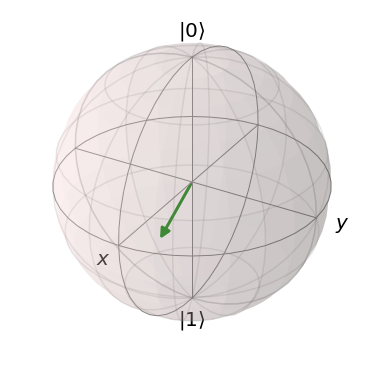

In [24]:
b = Bloch()
#b.add_states(basis(2,0))
#b.add_states(basis(2,1))
b.add_states(rand_ket(2))
b.show()

In [33]:
g = grad(rot)
g(2.,3.,4.)

TypeError: Gradient only defined for scalar-output functions. Output had shape: (2, 2).

In [ ]:
2

In [ ]:
## Gradient Descent 



#performance evaluation using average fidelity
def test_score(params,x,y):
    ## test score here is defined as average fidelity. One can have other similar definitions 
    fidel = 0
    for i in range(m):
        pred = np.matmul(make_unitary(params),x[i])
        #pred =  np.matmul(np.asarray(params).reshape(d,d),ket_input[i])
        step_fidel = fidelity(Qobj(pred).unit(),Qobj(y[i]).unit())
        #print(step_fidel)
        fidel += step_fidel
        
        
    return fidel/m

#gradient descent implementation 
#initialize parameters for descent
epochs = 100
alpha = 0.01
tol = 1e-7
diff = 1
max_iters = 500
iters = 0
loss_hist = []
fidel_hist = []
params_hist = []
weights = np.random.rand(2*N,1) 

for epoch in range (epochs):
    iters = 0
    #weights = weights + np.random.normal(size=(2*N,1))
    while np.all(diff > tol) and iters < max_iters:
        prev_weights = weights
        weights = weights - alpha*(der_cost(prev_weights, ket_input, ket_output))
        iters += 1
        diff = np.absolute(weights-prev_weights)
    loss = cost(weights,ket_input,ket_output)
    avg_fidel = test_score(weights,ket_input,ket_output)
    progress = [epoch+1, loss, avg_fidel]
    loss_hist.append(loss)
    fidel_hist.append(avg_fidel)
    params_hist.append(weights)
    if ((epoch)%10==9):
        print("Epoch: {:2f} | Loss: {:3f} | Fidelity: {:3f}".format(*np.asarray(progress)))
    
opt_params = weights